In [2]:
!nvidia-smi

Wed May  8 20:23:24 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.73       Driver Version: 410.73       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 760     Off  | 00000000:01:00.0 N/A |                  N/A |
| 41%   46C    P8    N/A /  N/A |    155MiB /  4034MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 760     Off  | 00000000:06:00.0 N/A |                  N/A |
| 38%   39C    P8    N/A /  N/A |      1MiB /  4037MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
        

In [3]:
IMG_WIDTH = 1400
IMG_HEIGHT = 1400
ROW_SLICE = slice(0, 1400)
COL_SLICE = slice(1000, None)

In [4]:
import os
import sys
import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
sys.path.append("../")

In [6]:
from UNet_inverted_dice import get_unet

Using TensorFlow backend.


In [7]:
%matplotlib inline

In [8]:
# ih_data dir
data_dir = "/data/uob/Jordan/"
# deepthought_data_dir
#data_dir = "/storage/yw18581/data"

In [9]:
## Loading data
print("Loading data")

Loading data


In [10]:
X_test = np.load(os.path.join(data_dir,"Xy_test.npz"))

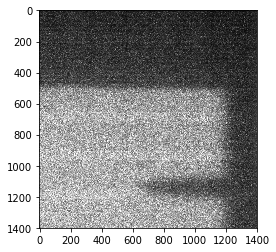

In [11]:
plt.imshow(X_test["x"][0][...,0],cmap='gray')

In [11]:
from keras.models import load_model
from UNet import get_unet

# UNet, 100 epochs, dice coeff with -, adam

In [13]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet.hdf5')

In [25]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [26]:
pred.shape

(1, 1400, 1400, 1)

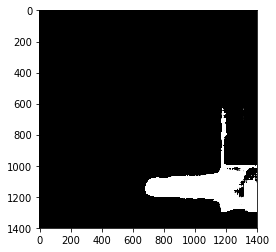

In [27]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 100 epochs, dice coeff with 1-, adam

In [29]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet_100epochs_inv_dice.hdf5')

In [30]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [31]:
pred.shape

(1, 1400, 1400, 1)

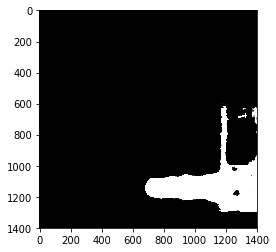

In [32]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 200 epochs, dice coeff with -, adam

In [34]:
model = get_unet()
model.load_weights("/data/uob/trained_models/trained_UNet_200epochs.hdf5")

In [35]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [36]:
pred.shape

(1, 1400, 1400, 1)

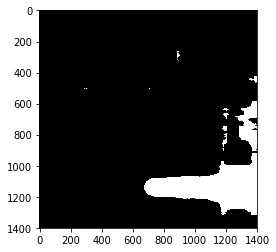

In [37]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 200 epochs, dice coeff with -, rmsprop

In [38]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet_200epochs_rmsprop.hdf5')

In [39]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [40]:
pred.shape

(1, 1400, 1400, 1)

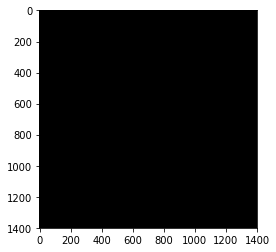

In [41]:
plt.imshow(pred[0,...,0],cmap='gray')

In [ ]:
model = get_unet()


In [42]:
model.load_weights('/data/uob/trained_models/trained_UNet_50epochs.hdf5')

In [43]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [44]:
pred.shape

(1, 1400, 1400, 1)

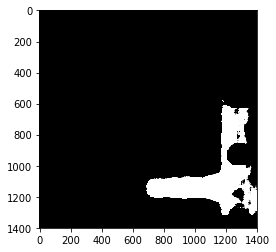

In [45]:
plt.imshow(pred[0,...,0],cmap='gray')

In [47]:
model = get_unet()

model.load_weights('/data/uob/trained_models/trained_UNet_500epochs.hdf5')

In [48]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

pred.shape

(1, 1400, 1400, 1)

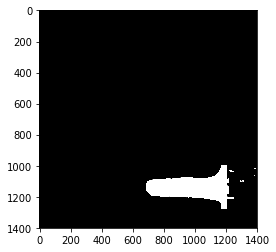

In [49]:
plt.imshow(pred[0,...,0],cmap='gray')

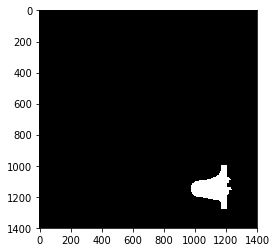

In [74]:
pred = model.predict(X_test["x"][1][np.newaxis,...])
plt.imshow(pred[0,...,0],cmap='gray')

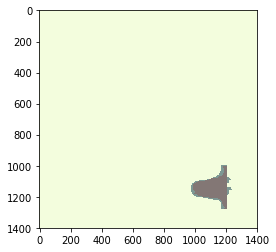

In [75]:
plt.imshow(X_test["y"][1],cmap='Wistia',alpha=0.5)
plt.imshow(pred[0,...,0],cmap='Blues',alpha=0.5)

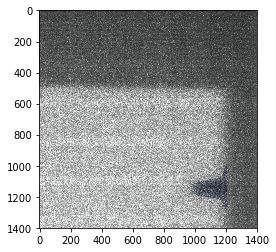

In [76]:
plt.imshow(X_test["x"][1][...,0],cmap='gray',alpha=1)
plt.imshow(X_test["y"][1],cmap='Blues',alpha=0.15)

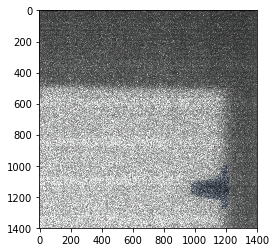

In [88]:
plt.imshow(X_test["x"][1][...,0],cmap='gray',alpha=1)
plt.imshow(pred[0,...,0],cmap='Blues',alpha=0.15)

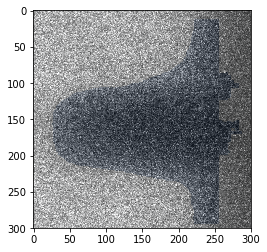

In [87]:
plt.imshow(X_test["x"][1][...,0][985:1285,950:1250],cmap='gray',alpha=1)
plt.imshow(pred[0,...,0][985:1285,950:1250],cmap='Blues',alpha=0.15)

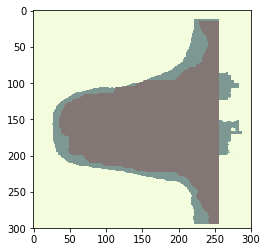

In [86]:
plt.imshow(X_test["y"][1][985:1285,950:1250],cmap='Wistia',alpha=0.5)
plt.imshow(pred[0,...,0][985:1285,950:1250,],cmap='Blues',alpha=0.5)

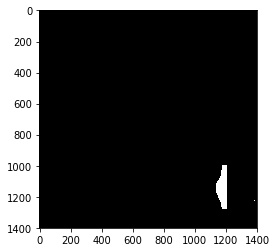

In [51]:
pred = model.predict(X_test["x"][2][np.newaxis,...])
plt.imshow(pred[0,...,0],cmap='gray')

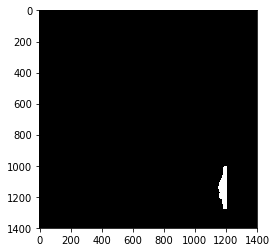

In [65]:
plt.imshow(X_test["y"][2],cmap='gray')

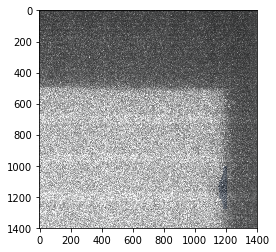

In [67]:
plt.imshow(X_test["x"][2][...,0],cmap='gray',alpha=1)
plt.imshow(X_test["y"][2],cmap='Blues',alpha=0.15)

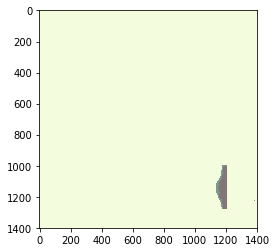

In [73]:
plt.imshow(X_test["y"][2],cmap='Wistia',alpha=0.5)
plt.imshow(pred[0,...,0],cmap='Blues',alpha=0.5)

In [12]:
model = get_unet()

model.load_weights('/data/uob/trained_models/retrained_UNet_500+250epochs.hdf5')


In [13]:
pred_ret = model.predict(X_test["x"][0][np.newaxis,...])

pred_ret.shape

(1, 1400, 1400, 1)

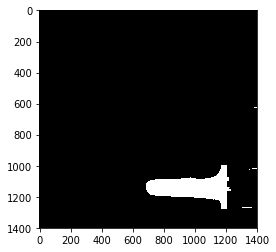

In [14]:
plt.imshow(pred_ret[0,...,0], cmap='gray')

In [12]:
model = get_unet()

model.load_weights('/data/uob/trained_models/retrained_UNet_500+250+250epochs.hdf5')



In [13]:
pred_ret2 = model.predict(X_test["x"][0][np.newaxis,...])

pred_ret2.shape

(1, 1400, 1400, 1)

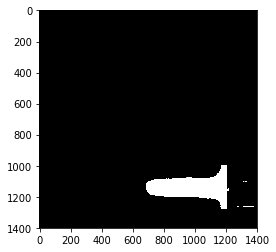

In [14]:
plt.imshow(pred_ret2[0,...,0], cmap='gray')

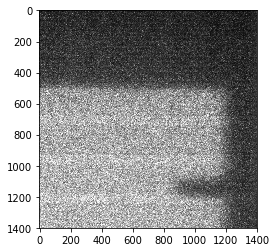

In [15]:
plt.imshow(imread("/data/uob/10x10_15mm_v2_8bit/File_0.tiff")[ROW_SLICE,COL_SLICE], cmap='gray')

In [16]:
img15 = imread("/data/uob/10x10_15mm_v2_8bit/File_0.tiff")[ROW_SLICE,COL_SLICE]

In [17]:
img15.shape

(1400, 1400)

In [18]:
pred15 = model.predict(img15[np.newaxis,...,np.newaxis])

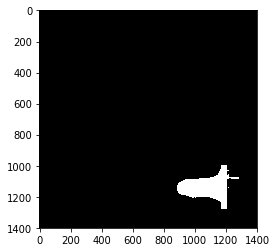

In [19]:
plt.imshow(pred15[0,...,0], cmap='gray')

In [20]:
img15double = imread("/data/uob/10x10_15mm_v2_8bit/File_0_double.tiff")[ROW_SLICE,COL_SLICE]

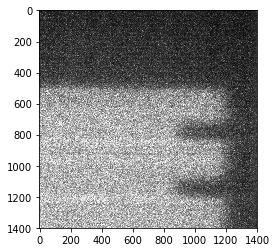

In [21]:
plt.imshow(img15double, cmap='gray')

In [22]:
pred15double = model.predict(img15double[np.newaxis,...,np.newaxis])

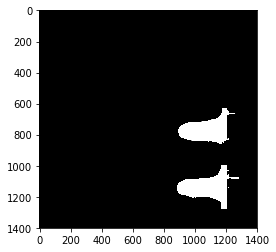

In [23]:
plt.imshow(pred15double[0,...,0], cmap='gray')

In [24]:
model1250 = get_unet()

model1250.load_weights('/data/uob/trained_models/retrained_UNet_1000+250epochs.hdf5')

In [18]:
pred_1250 = model1250.predict(X_test["x"][0][np.newaxis,...])
pred_1250.shape

(1, 1400, 1400, 1)

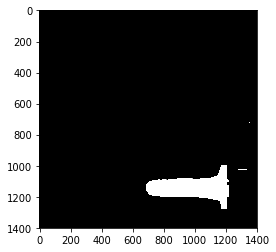

In [19]:
plt.imshow(pred_1250[0,...,0], cmap='gray')

---

## TESTING with FOUR LEAVES

```python
model = get_unet()
model.load_weights('/data/uob/trained_models/retrained_UNet_500+250+250epochs.hdf5')
```

In [12]:
MODEL_CHECKPOINT_1000_EPOCHS = '/data/uob/trained_models/retrained_UNet_500+250+250epochs.hdf5'
MODEL_CHECKPOINT_1500_EPOCHS = '/data/uob/trained_models/retrained_UNet_1000+500epochs.hdf5'

In [13]:
model_4leaves = get_unet()
model_4leaves.load_weights(MODEL_CHECKPOINT_1500_EPOCHS)

In [14]:
check_preds = model_4leaves.predict(X_test["x"][0][np.newaxis,...])
check_preds.shape

(1, 1400, 1400, 1)

In [15]:
X_test["x"].shape

(396, 1400, 1400, 1)

In [16]:
model_4leaves.metrics_names

['loss', 'dice_coef']

In [17]:
dice_loss = model_4leaves.evaluate(x=X_test["x"], y=X_test["y"], verbose=1, batch_size=2)

396/396 [==============================] - 509s 1s/step


In [18]:
dice_loss

[-0.8608174637110546, 1.8608174637110546]

In [23]:
dice_loss_all = list()
for i in range(396):
    loss, _ = model_4leaves.evaluate(x=X_test["x"][i][np.newaxis, ...], y=X_test["y"][i][np.newaxis, ...], verbose=1, batch_size=1)
    dice_loss_all.append(loss * -1)
    print('{} done'.format(i))

1/1 [==============================] - 1s 1s/step
0 done
1/1 [==============================] - 1s 1s/step
1 done
1/1 [==============================] - 1s 1s/step
2 done
1/1 [==============================] - 1s 1s/step
3 done
1/1 [==============================] - 1s 1s/step
4 done
1/1 [==============================] - 1s 1s/step
5 done
1/1 [==============================] - 1s 1s/step
6 done
1/1 [==============================] - 1s 1s/step
7 done
1/1 [==============================] - 1s 1s/step
8 done
1/1 [==============================] - 1s 1s/step
9 done
1/1 [==============================] - 1s 1s/step
10 done
1/1 [==============================] - 1s 1s/step
11 done
1/1 [==============================] - 1s 1s/step
12 done
1/1 [==============================] - 1s 1s/step
13 done
1/1 [==============================] - 1s 1s/step
14 done
1/1 [==============================] - 1s 1s/step
15 done
1/1 [==============================] - 1s 1s/step
16 done
1/1 [===================

In [24]:
len(dice_loss_all)

396

In [25]:
dice_loss_all[:10]

[0.9851194620132446,
 0.966001033782959,
 0.9893033504486084,
 0.9666982889175415,
 0.9803379774093628,
 0.8822804689407349,
 0.6293454170227051,
 0.9741156101226807,
 0.9895293712615967,
 0.9833657741546631]

In [26]:
np.mean(dice_loss_all)

0.8529093554525664

In [27]:
np.std(dice_loss_all)

0.1840245648515208

In [28]:
np.var(dice_loss_all)

0.03386504046879158

In [168]:
from keras import backend as K 

# Do some code, e.g. train and save model

K.clear_session()

In [ ]:
dice_loss

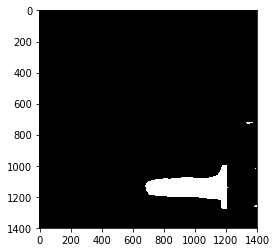

In [141]:
plt.imshow(check_preds[0,...,0], cmap='gray')

In [127]:
img_4leaves = imread("/data/uob/10x10_15mm_v2_8bit/File_0_multi.tiff")[550:1950,COL_SLICE]

In [128]:
img_4leaves.shape

(1400, 1400, 4)

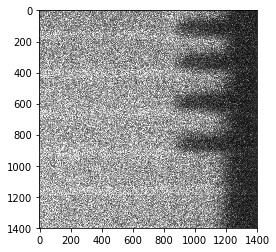

In [129]:
plt.imshow(img_4leaves[:,:,0], cmap='gray')
plt.show()

In [130]:
img_test = img_4leaves[..., 0][np.newaxis, ..., np.newaxis]

In [131]:
img_test.shape

(1, 1400, 1400, 1)

In [132]:
pred_4leaves = model_4leaves.predict(img_test)

In [133]:
pred_4leaves.shape

(1, 1400, 1400, 1)

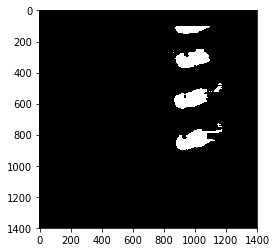

In [136]:
plt.imshow(pred_4leaves[0, ..., 0], cmap='gray')
plt.show()

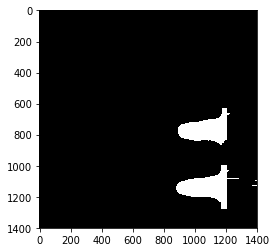

In [142]:
pred_double = model_4leaves.predict(img15double[np.newaxis,...,np.newaxis])
plt.imshow(pred_double[0, ..., 0], cmap='gray')
plt.show()

In [143]:
img_3leaves = imread("/data/uob/10x10_15mm_v2_8bit/File_0_three.tiff")[ROW_SLICE,COL_SLICE]

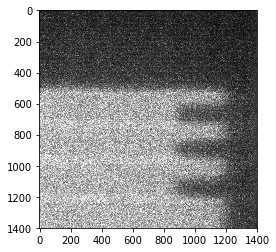

In [145]:
plt.imshow(img_3leaves, cmap='gray')
plt.show()

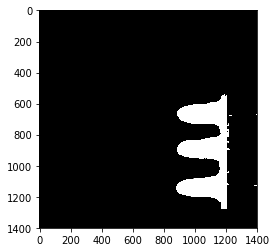

In [146]:
pred_three = model_4leaves.predict(img_3leaves[np.newaxis,...,np.newaxis])
plt.imshow(pred_three[0, ..., 0], cmap='gray')
plt.show()

In [154]:
img_four = imread("/data/uob/10x10_15mm_v2_8bit/File_0_four.tiff")[200:1600,COL_SLICE]

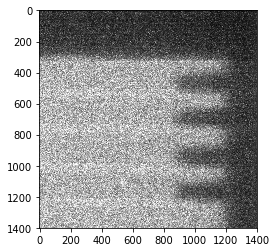

In [174]:
plt.imshow(img_four, cmap='gray')
#plt.show()
plt.savefig("four_leaves.png")

In [1]:
pred_four = model_4leaves.predict(img_four[np.newaxis,...,np.newaxis])
plt.imshow(pred_four[0, ..., 0], cmap='gray')
plt.show()
plt.savefig("four_leaves_unet.png")

NameError: name 'model_4leaves' is not defined

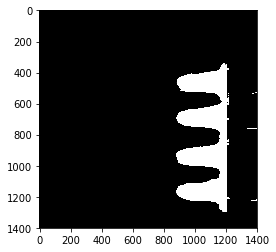

In [173]:
plt.imshow(pred_four[0, ..., 0], cmap='gray')
#plt.show()
plt.savefig("four_leaves_unet.png")

In [13]:
import os
from UNet import get_unet
from data_loaders_km3 import data_generator, get_n_iterations
from os import path as p
import tensorflow as tf
from tqdm import tqdm
import numpy as np

In [14]:
def inference_step(network_model, test_data_generator, predict_steps):

    y_pred = list()

    for _ in tqdm(range(predict_steps)):
        X_batch, _ = next(test_data_generator)
        Y_batch_pred = network_model.predict_on_batch(X_batch)
        #print(Y_batch_pred.shape)
        y_pred.append(Y_batch_pred)
    y_pred = np.concatenate(y_pred, axis=0)

    return y_pred

In [33]:
DATA_DIR_IH="/data/uob"
data_folder = DATA_DIR_IH
TRAIN_VAL_TEST_DIR = os.path.join(data_folder,"train_validation_test")
N_EPOCHS=1500
N_FILES = 1
BATCH_SIZE=3

In [25]:
model = get_unet()
#model.summary()

In [34]:
CHECKPOINT_FOLDER_PATH = p.join(data_folder, 'trained_models')
TASK_NAME = 'UNet_training_generator_{}epochs'.format(N_EPOCHS)
TASK_FOLDER_PATH = os.path.join(CHECKPOINT_FOLDER_PATH, TASK_NAME)

In [35]:
if not os.path.exists(TASK_FOLDER_PATH):
    os.makedirs(TASK_FOLDER_PATH)


In [24]:
TRAINING_WEIGHTS_FILEPATH=os.path.join(CHECKPOINT_FOLDER_PATH,'retrained_UNet_1000+500epochs.hdf5')

In [26]:
fname_test = [os.path.join(TRAIN_VAL_TEST_DIR,"Xy_test.npz")]

model.load_weights(TRAINING_WEIGHTS_FILEPATH)
prediction_steps, n_evts_test = get_n_iterations(fname_test, batch_size=BATCH_SIZE)

['/data/uob/train_validation_test/Xy_test.npz']
/data/uob/train_validation_test/Xy_test.npz
(240, 1400, 1400, 1)


In [45]:
np.load(fname_test[0])['x'].shape

(240, 1400, 1400, 1)

In [27]:
test_data_gen = data_generator(fname_test, batch_size=BATCH_SIZE,
                               ftarget=lambda y: y)

In [28]:
y_pred = inference_step(model, test_data_gen, prediction_steps)

100%|██████████| 80/80 [05:23<00:00,  3.68s/it]


In [48]:
y_pred.shape

(240, 1400, 1400, 1)

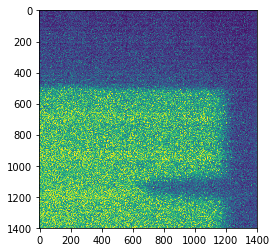

In [31]:
plt.imshow(X_test['x'][0][...,0])

In [38]:
np.savez_compressed(os.path.join(TASK_FOLDER_PATH,"Xy_test_pred.npz"),
                   x=X_test['x'][...,0], y=y_pred[...,0])